# Exploratory Data Analysis of New York City TLC Data
---
Notebook Summary Report
Commission Prepared by **Automidata**


#### Proyect Overview

The NYC Taxi & Limousine Commission has contracted with Automatidata to build a machine learning model that predicts taxi/limousine ride durations.

**The Problem**

After running initial exploratory data analysis (EDA) on a sample of the data provided by New York City TLC, it is clear that some of the data will prove an obstacle for accurate ride duration prediction. Namely, trips that have a total cost entered, but a total distance of “0.” At this point, our analysis indicates these to be anomalies or outliers that need to be factored into the algorithm or removed completely.

**Proposed solution** 

After analysis, we recommend removing outliers with a total distanced recorded of 0. 

**Visuals** [TLC-2017](https://public.tableau.com/app/profile/mario.hevia.cavieres/viz/DistanceVSAmountTLC2017/Sheet1)

**Keys to success**

Ensuring with New York City TLC that the sample provided is an accurate reflection of their data as a whole.
Plan for handling other outliers, such as low trip distance paired with high high costs.

**Next Steps**

Determine “problem areas” for predicting trip duration.
For example, locations that have longer durations.
Determine the variables that have the largest impact on trip duration.
Pare down data to the most relevant variables for running regression, statistical analysis, and parameter tuning.

The following will explain the previous notes.


## Steps

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. 
The mission is to continue the investigation we began in last notebook [notebook](http://localhost:8888/lab/tree/automatidata/pythonDS/automatidataProject2.ipynb) and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** Clean data set and create a visualization.

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
* Data cleaning
  - Determineate state of the data observing:
    - Data types.
    - Missing information.
    - Validate inputs.
    - Distributions.
    - Detrminate Outliers, Do we keep/delete them?.
    - Verify as we go.


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

* Determinate if transformations or restructurizations are neccesary
    - String data into Date/Time objects.
    - Creation of new columns based on known information.
    - Construct Visualizations
    - Determinate insights, recommendations, new formulated questions from the observed.


Follow the instructions and answer the questions. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.


## Notes in Outliers

1. Identifing outliers:

  * Statistical analysis, Descriptors of tendency, disperssion, location.
  * Boxplot to visualize the distribution of the data
  * Histograms to visualize the distribution of the data
  
**Options:**

- **Delete** them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
- **Reassign** them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
- **Leave** them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

Different type of model have different assumptions. There is no right answer only based after model selection.


In [1]:
## This are the packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import exploratory_data_analysis.eda_functions as eda ## house EDA functions, and a work in progress.
## For encoding
from sklearn.preprocessing import LabelEncoder
import scipy

import datetime as dt

import warnings as cuidado
cuidado.filterwarnings('ignore')

In [2]:
## Instantiate  and initialize a df pandas data frame object
## and populating it from the location of the csv file.
loc = '/home/scicat/Downloads/coursera/automatidata/pythonDS/2017_Yellow_Taxi_Trip_Data.csv'
df =  pd.read_csv(loc)
print(df.shape)

(22699, 18)


In [3]:
## Selecting the first 10 entries
df.head(10)#3004672

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


## Column name and Description
---
**ID :** Trip identification number. 

**VendorID:** A code indicating the TPEP provider that provided the record.  

        1= Creative Mobile Technologies, LLC; 
        
        2= VeriFone Inc.

**tpep_pickup_datetime:** The date and time when the meter was engaged. 

**tpep_dropoff_datetime:** The date and time when the meter was disengaged. 

**Passenger_count:** The number of passengers in the vehicle. This is a driver-entered value.

**Trip_distance:** The elapsed trip distance in miles reported by the taximeter.

**PULocationID:** TLC Taxi Zone in which the taximeter was engaged.

**DOLocationID:** TLC Taxi Zone in which the taximeter was disengaged.

**RateCodeID:** The final rate code in effect at the end of the trip. 

        1= Standard rate 
        
        2=JFK 
        
        3=Newark 
        
        4=Nassau or Westchester 
        
        5=Negotiated fare 
        
        6=Group ride

**Store_and_fwd_flag:** This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. 
        
        Y= store and forward trip 
        
        N= not a store and forward trip

**Payment_type:** A numeric code signifying how the passenger paid for the trip. 
        
        1= Credit card 
        
        2= Cash 
        
        3= No charge 
        
        4= Dispute 
        
        5= Unknown 
        
        6= Voided trip

**Fare_amount:** The time-and-distance fare calculated by the meter.

**Extra:** Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

**MTA_tax:** $0.50 MTA tax that is automatically triggered based on the metered rate in use.

**Improvement_surcharge:** $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

**Tip_amount:** This field is automatically populated for credit card  tips. Cash tips are not included.

**Tolls_amount:** Total amount of all tolls paid in trip. 

**Total_amount:** The total amount charged to passengers. Does not include cash tips.

---

In [4]:
## Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

#### Looking for 'not a numbers' types, invalid values from a list and unique items
`invalid_list = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '--','.','', ' ', '   ']`
#### Also observing if there is any missing values:


In [5]:
eda.get_invalid_values(df)

,nulls,invalids,unique_item
Unnamed: 0,0,0,"[24870114, 35634249, 106203690, 38942136, 3084..."
VendorID,0,0,"[2, 1]"
tpep_pickup_datetime,0,0,"[03/25/2017 8:55:43 AM, 04/11/2017 2:53:28 PM,..."
tpep_dropoff_datetime,0,0,"[03/25/2017 9:09:47 AM, 04/11/2017 3:19:58 PM,..."
passenger_count,0,0,"[6, 1, 2, 4, 5, 3, 0]"
trip_distance,0,0,"[3.34, 1.8, 1.0, 3.7, 4.37, 2.3, 12.83, 2.98, ..."
RatecodeID,0,0,"[1, 2, 5, 3, 4, 99]"
store_and_fwd_flag,0,0,"[N, Y]"
PULocationID,0,0,"[100, 186, 262, 188, 4, 161, 79, 237, 234, 239..."
DOLocationID,0,0,"[231, 43, 236, 97, 112, 241, 114, 249, 237, 14..."


In [6]:
eda.miss_df(df)

,Total,Percent
Unnamed: 0,0,0.0
VendorID,0,0.0
improvement_surcharge,0,0.0
tolls_amount,0,0.0
tip_amount,0,0.0
mta_tax,0,0.0
extra,0,0.0
fare_amount,0,0.0
payment_type,0,0.0
DOLocationID,0,0.0



**Seems like the data is complete**

#### Descriptive Statistics

In [7]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [8]:
## a qick transformation
le = LabelEncoder()
df['store_and_fwd_flag'] = le.fit_transform(df['store_and_fwd_flag'])

## Visual observations of grouped data
I'm going to group the data by similarities and plot groups.


In [9]:
## Selection of the data types:
continious = [
    'Unnamed: 0',
    'passenger_count',
    'trip_distance',
    'fare_amount',
    'tip_amount',
    'tolls_amount',
    'total_amount'
]

ordinal = [
    'RatecodeID',
    'payment_type', 
    'improvement_surcharge',
    'extra',
    'mta_tax',
    'passenger_count',
] 

nominal = [
    'PULocationID',
    'DOLocationID',  
]

binary = [
    'store_and_fwd_flag',
    'VendorID',
]

dateTime = [
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
]

1     22070
2       513
5        68
3        39
4         8
99        1
Name: RatecodeID, dtype: int64


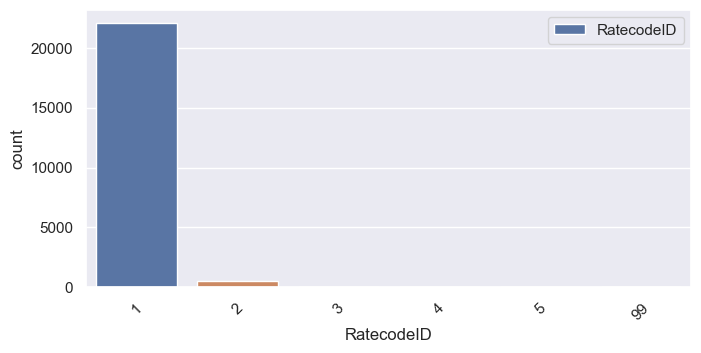

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64


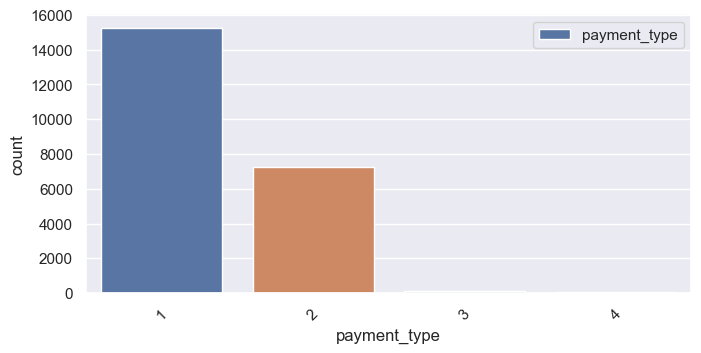

 0.3    22679
-0.3       14
 0.0        6
Name: improvement_surcharge, dtype: int64


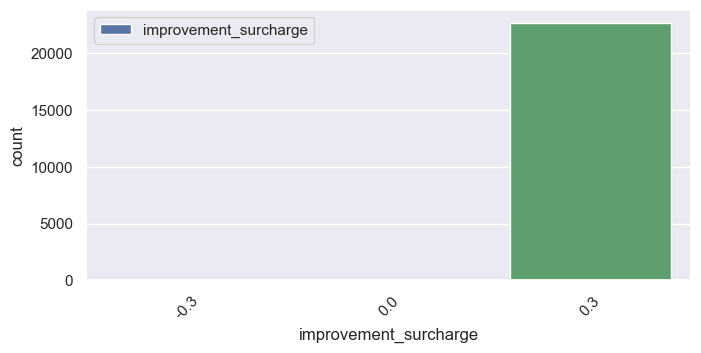

 0.0    11921
 0.5     7104
 1.0     3564
 4.5      101
-0.5        7
-1.0        2
Name: extra, dtype: int64


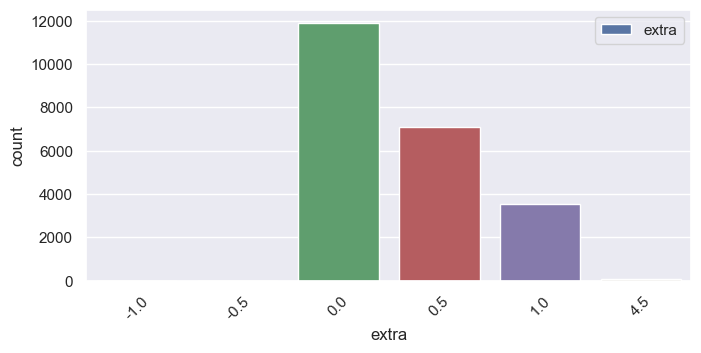

 0.5    22596
 0.0       90
-0.5       13
Name: mta_tax, dtype: int64


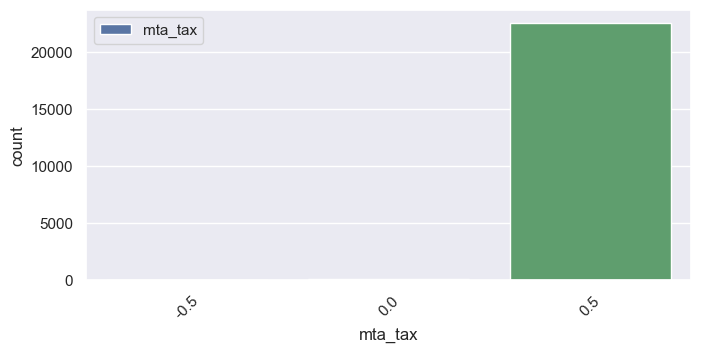

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64


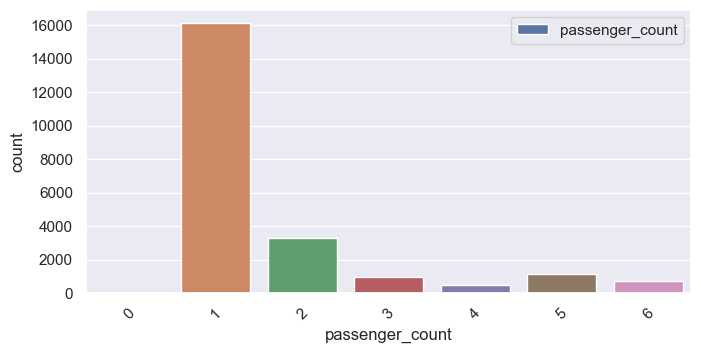

0    22600
1       99
Name: store_and_fwd_flag, dtype: int64


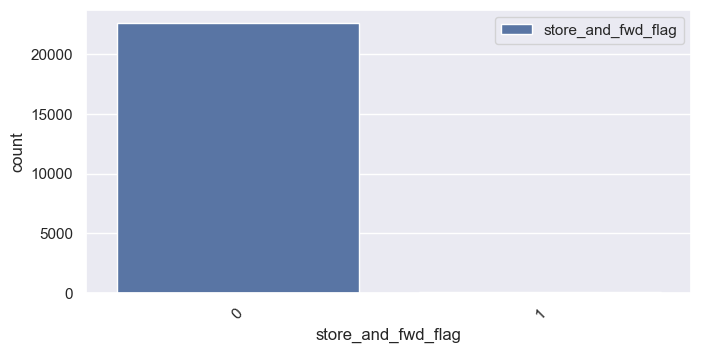

2    12626
1    10073
Name: VendorID, dtype: int64


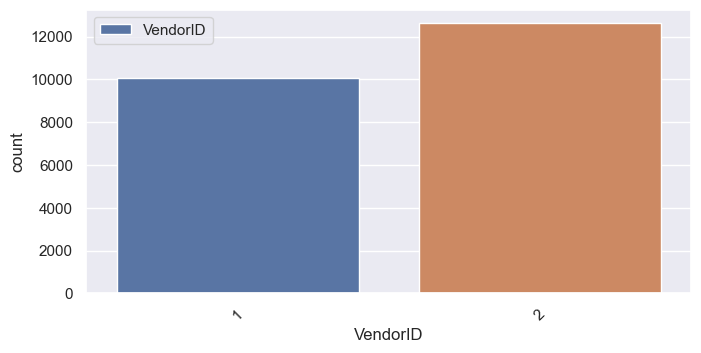

In [10]:
## Observing the counts per categoty
for cat in ordinal + binary:
    print(df[cat].value_counts())
    plt.figure(figsize = (8.48,5)) #18, 8
    ax = sns.countplot(x=df[cat], label=cat);
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout(pad=5.0)
    plt.show()
    

#### Note:
```          
1   passanger   16117 rides  
2   passanger   3305 rides  
5   passanger   1143 rides  
3   passanger   953 rides  
6   passanger   693 rides  
4   passanger   455 rides  
0   passanger   33 rides  
```
16117 rides of one passanger

33 of zero passanger ??

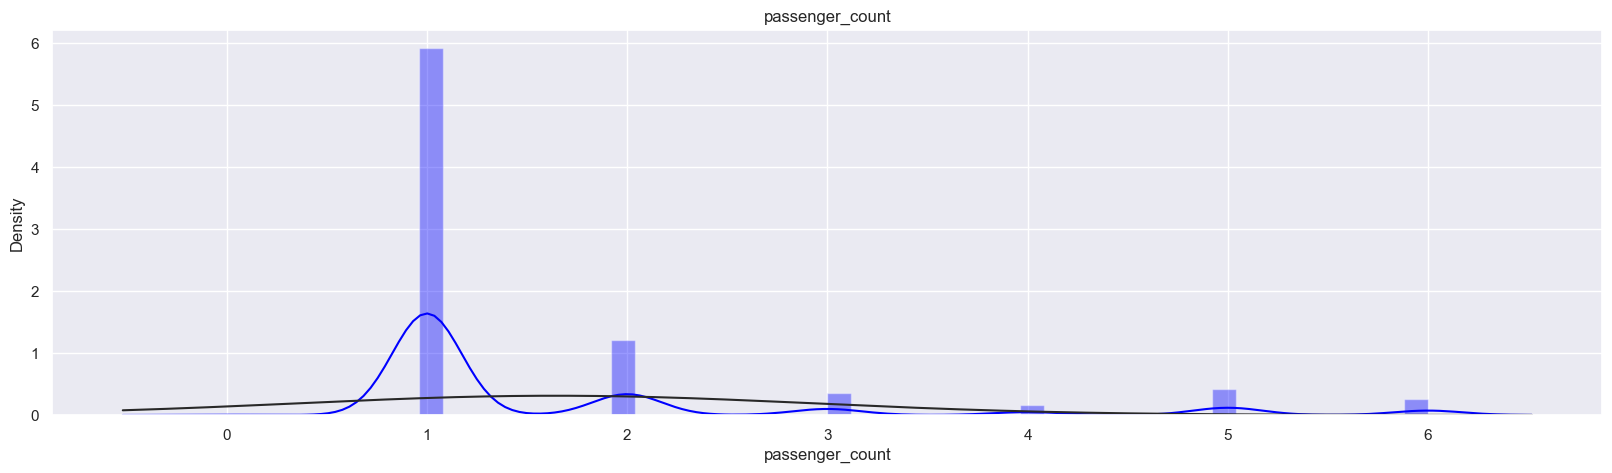

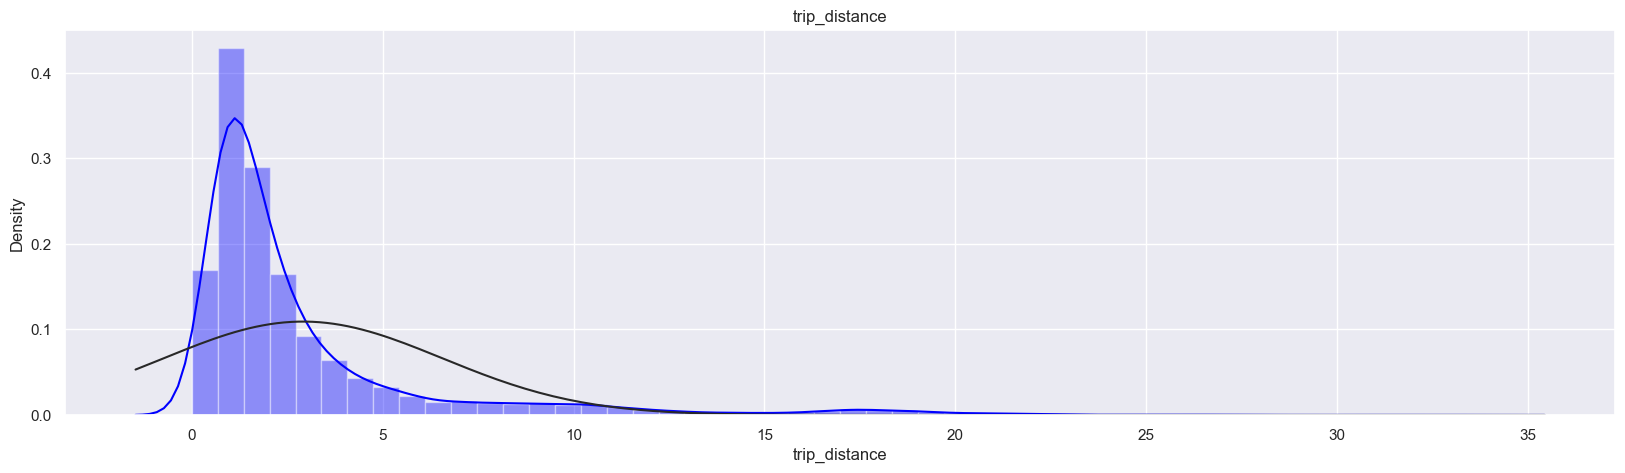

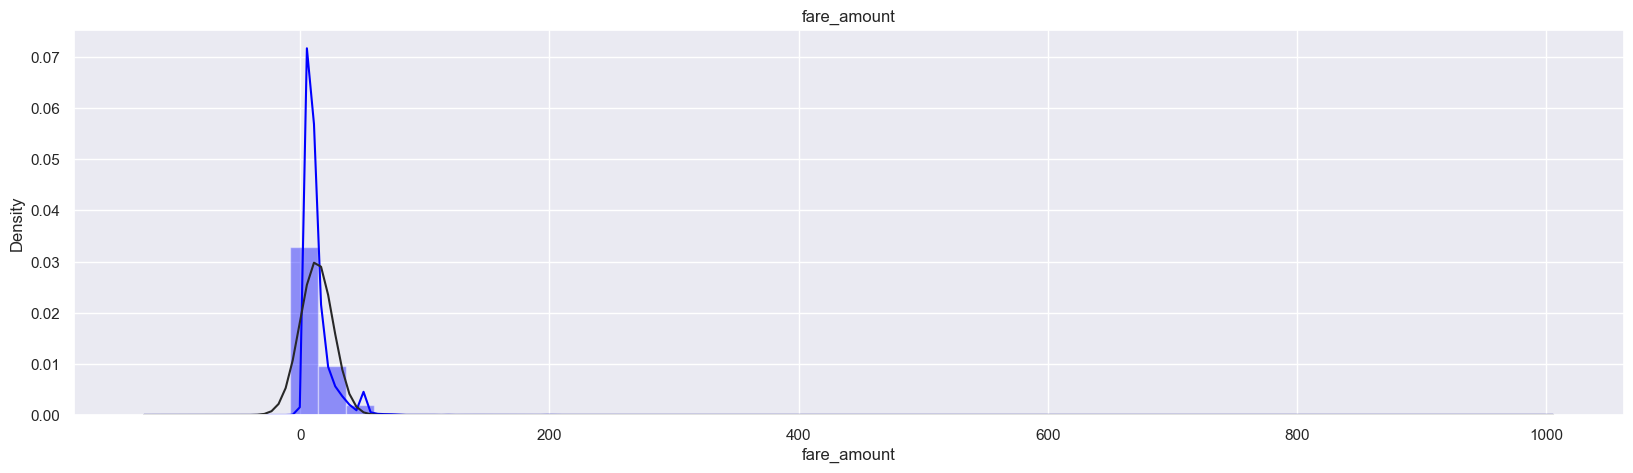

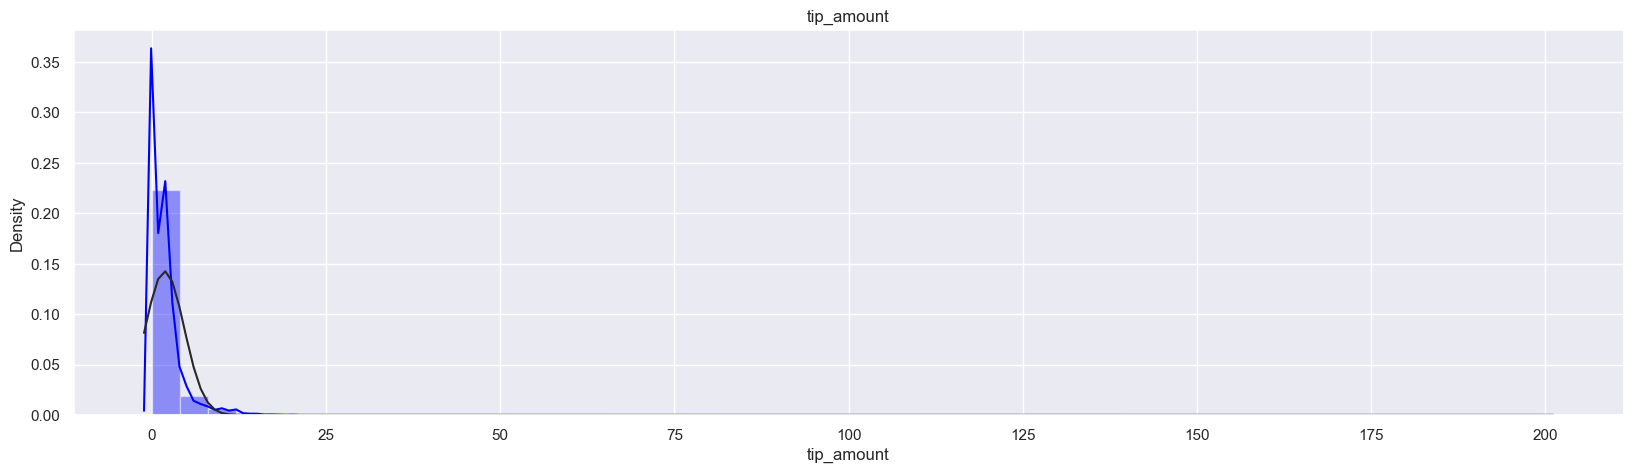

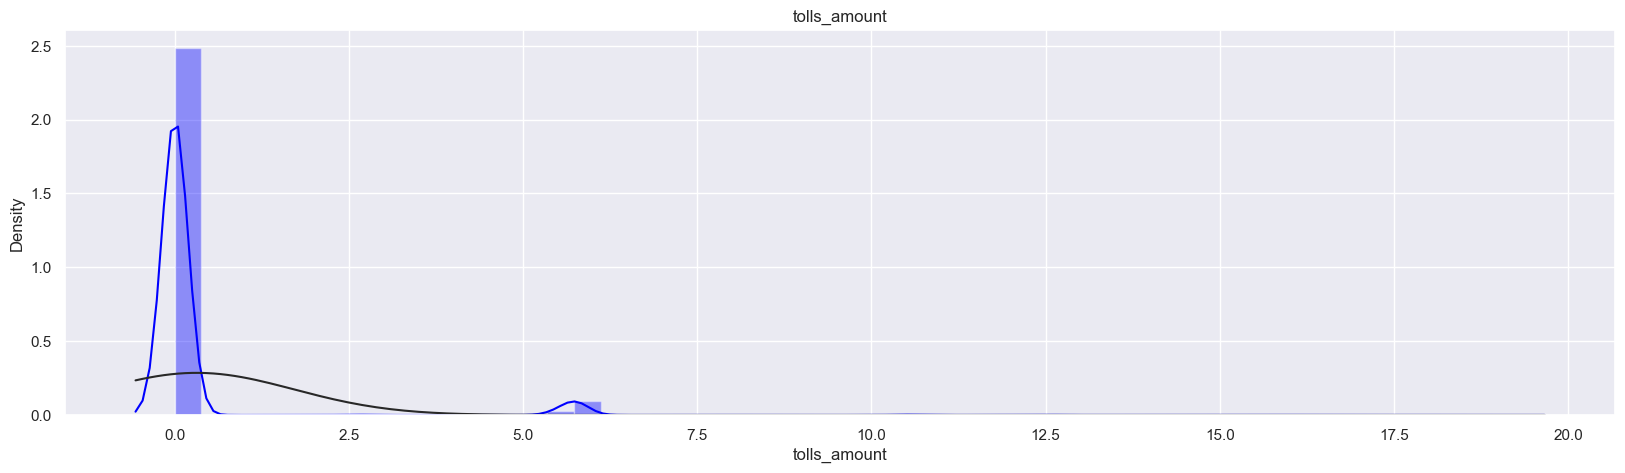

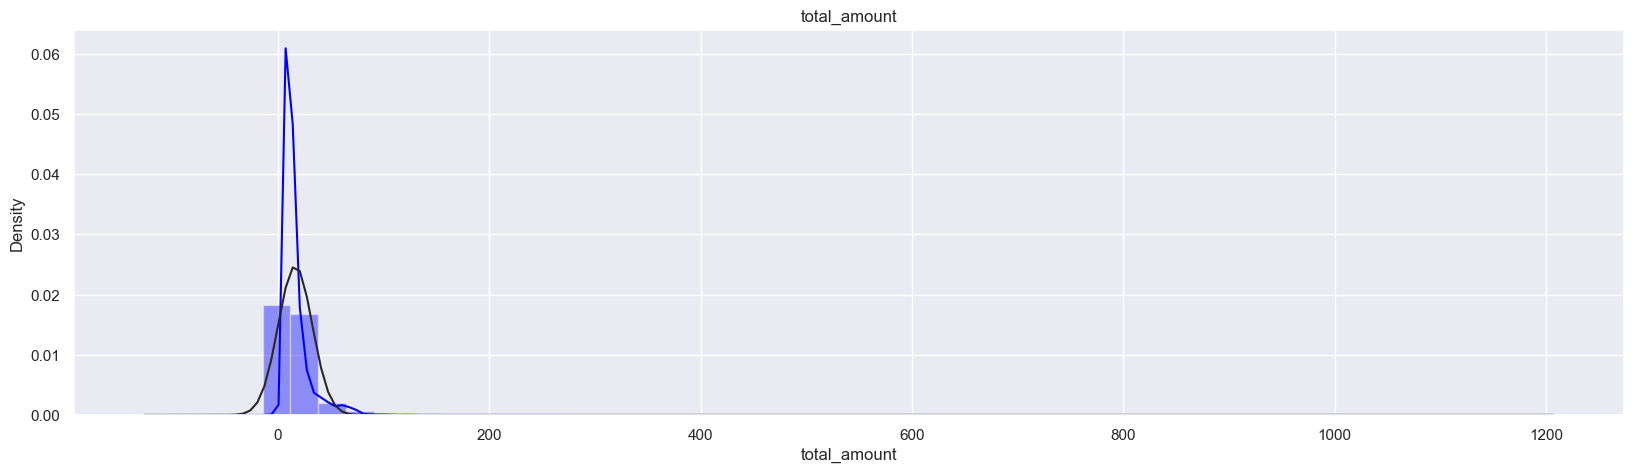

In [11]:
## continious variables
for col in continious[1:]:
    plt.figure(figsize = (20,5))
    sns.distplot(df[col], kde=True, fit=scipy.stats.norm , color='Blue')
    ax.set_xticks(range(0,21,1))
    ax.set_xticklabels(range(0,21,1))
    plt.title(col)

            tip_amount
RatecodeID            
1             1.669099
2             7.435497
3             9.452564
4             3.633750
5             9.136029
99            0.000000


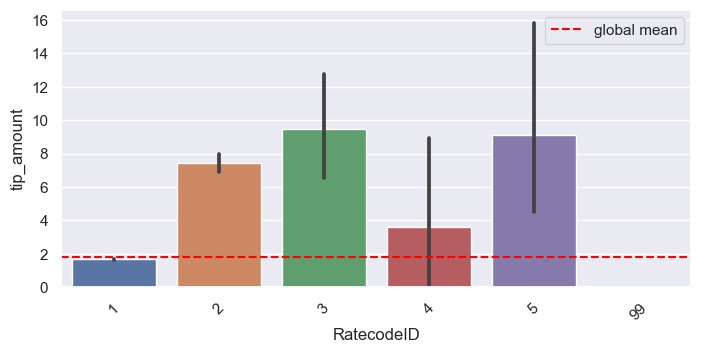

              tip_amount
payment_type            
1                 2.7298
2                 0.0000
3                 0.0000
4                 0.0000


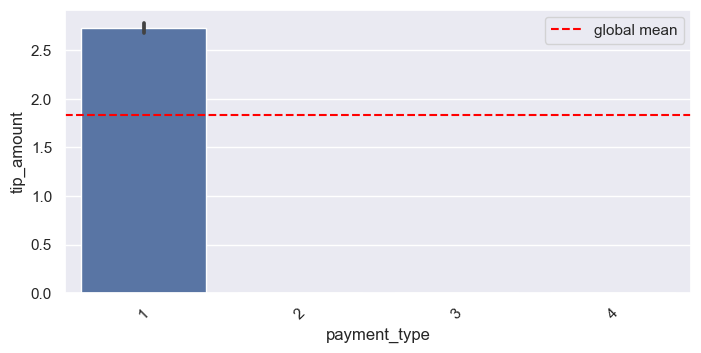

                       tip_amount
improvement_surcharge            
-0.3                     0.000000
 0.0                     1.720000
 0.3                     1.836945


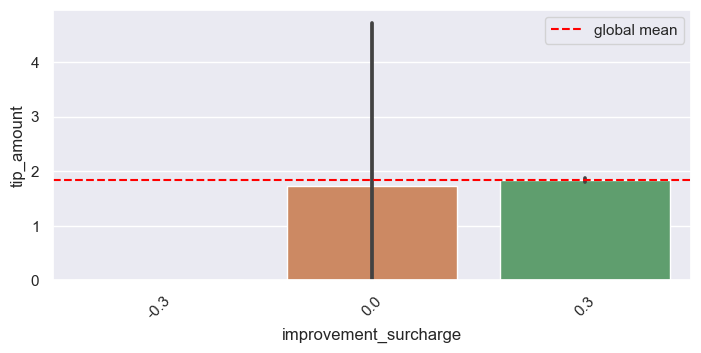

       tip_amount
extra            
-1.0     0.000000
-0.5     0.000000
 0.0     1.865927
 0.5     1.754177
 1.0     1.746627
 4.5     7.327030


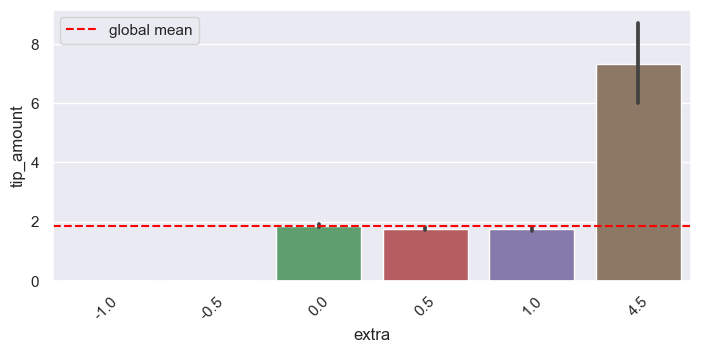

         tip_amount
mta_tax            
-0.5       0.000000
 0.0       9.413778
 0.5       1.806654


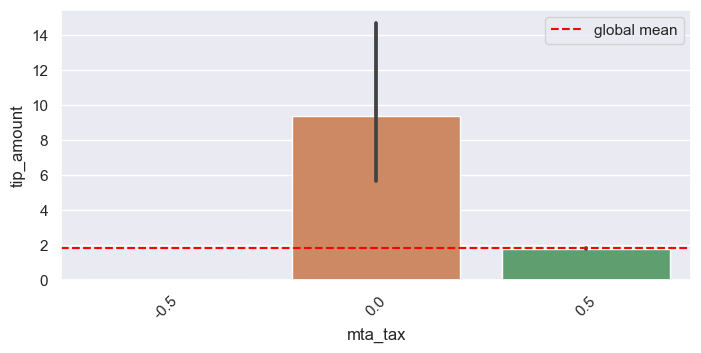

                 tip_amount
passenger_count            
0                  2.135758
1                  1.848920
2                  1.856378
3                  1.716768
4                  1.530264
5                  1.873185
6                  1.720260


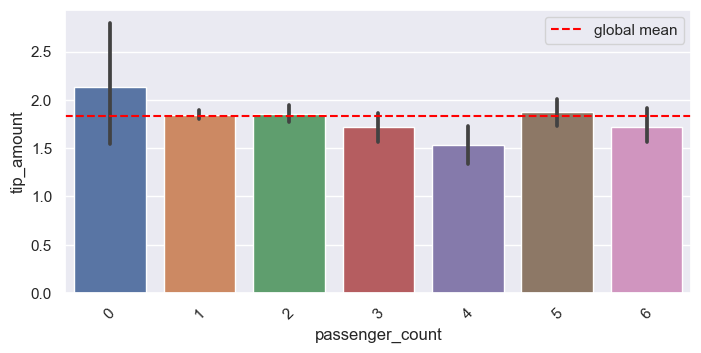

                    tip_amount
store_and_fwd_flag            
0                     1.835397
1                     1.923434


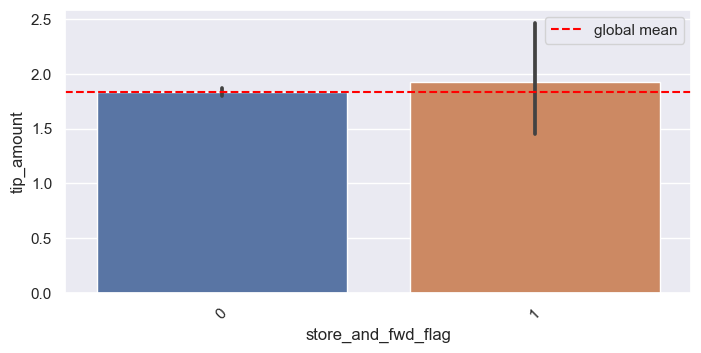

          tip_amount
VendorID            
1            1.83725
2            1.83461


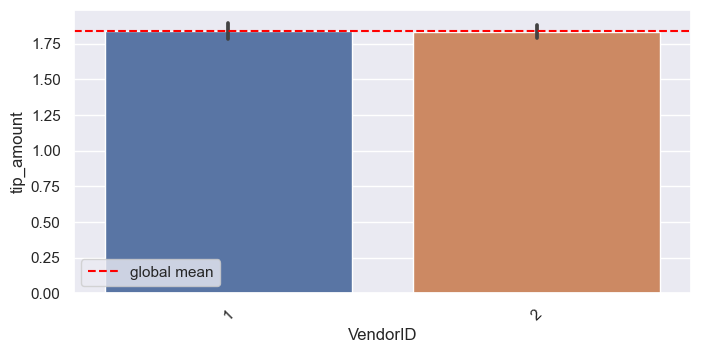

In [12]:
## Observing categorical variables respective to the tip amount
for cat in ordinal + binary:
    print(df.groupby([cat]).mean()[['tip_amount']])
    plt.figure(figsize = (8.48,5)) #18, 8
    ax = sns.barplot(x=cat, y='tip_amount', data=df)
    ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout(pad=5.0)
    plt.show()

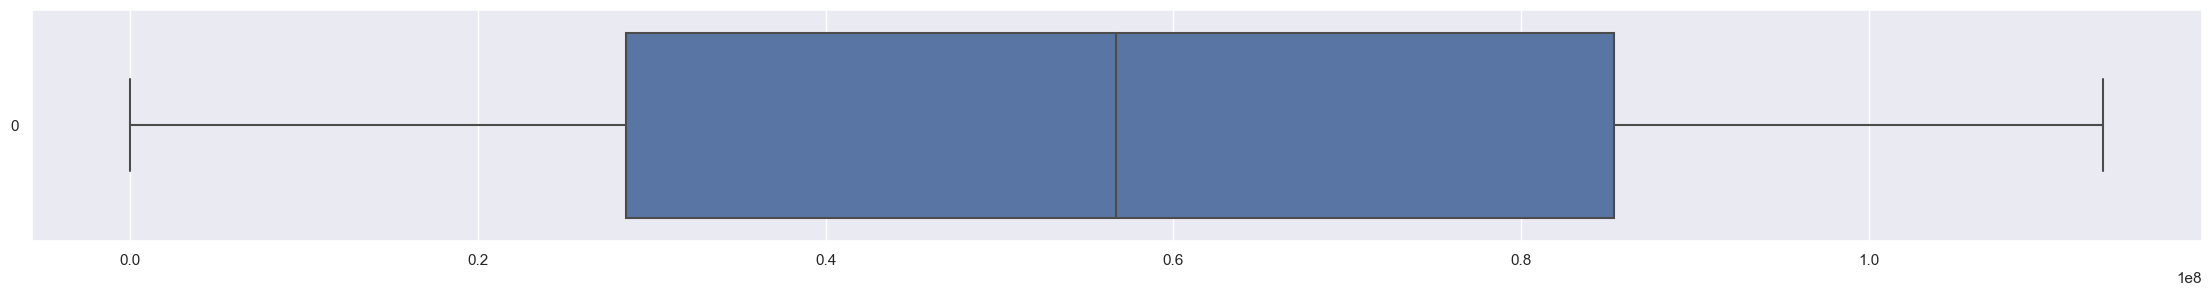

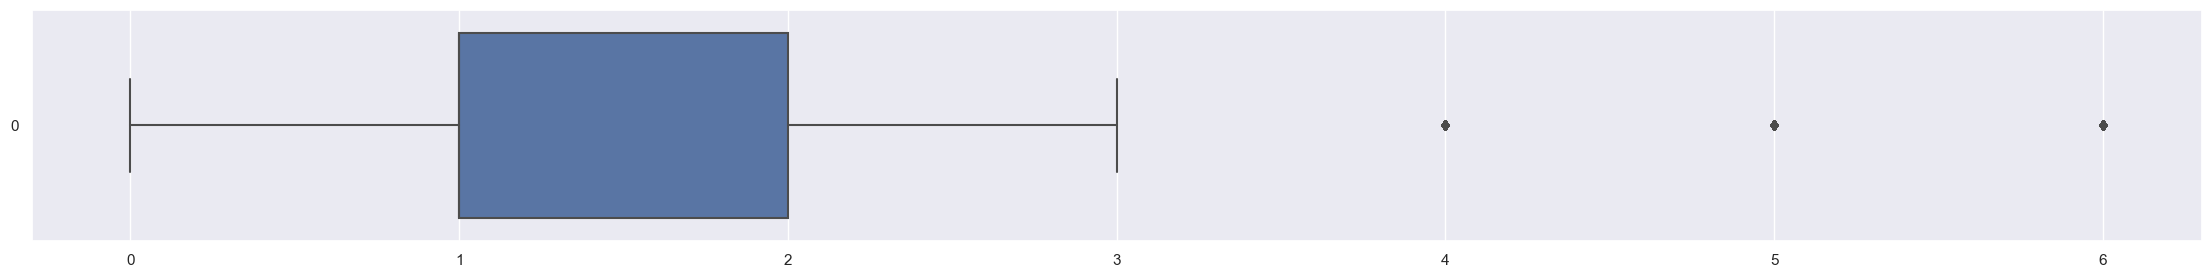

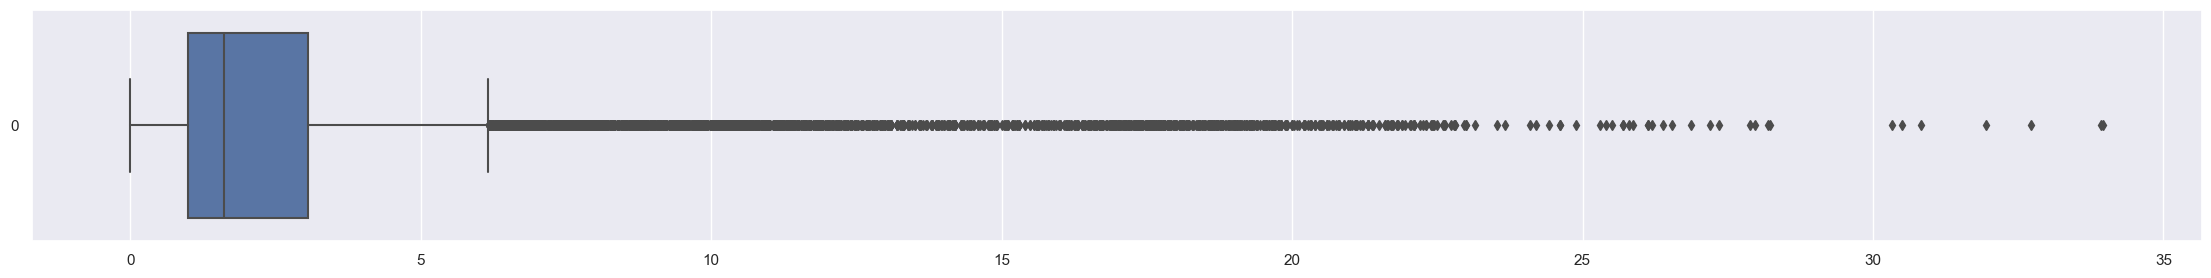

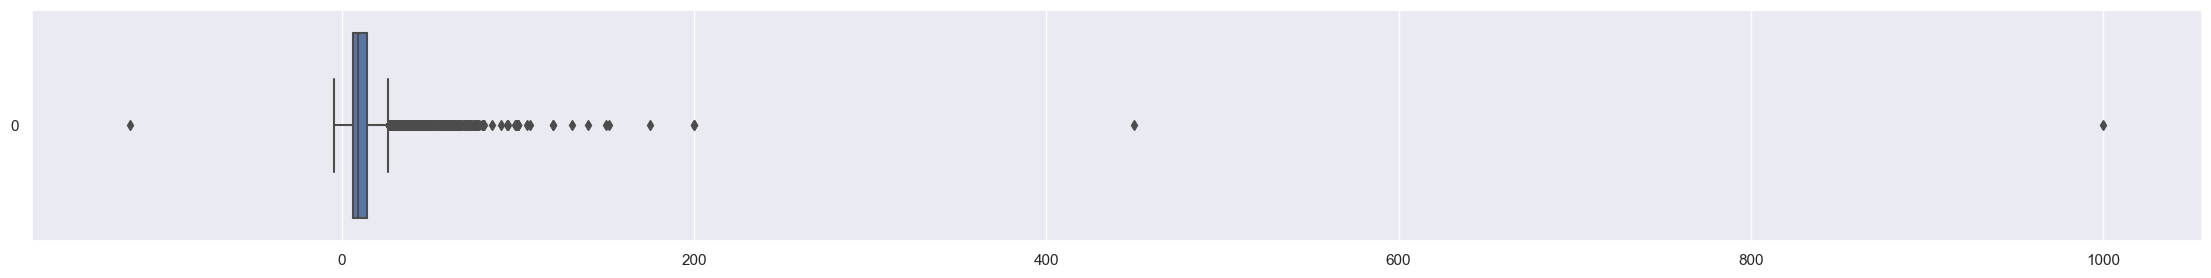

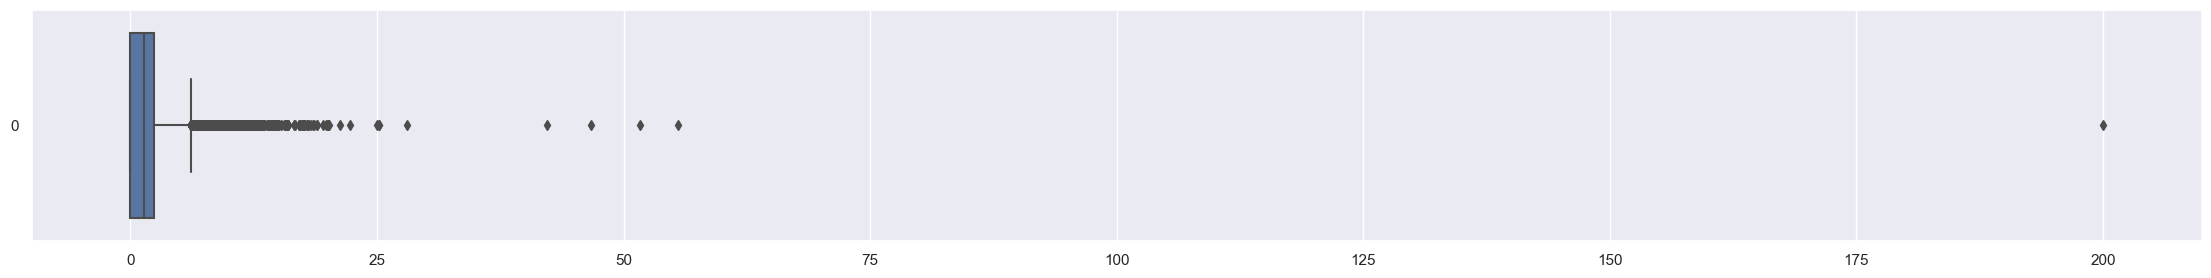

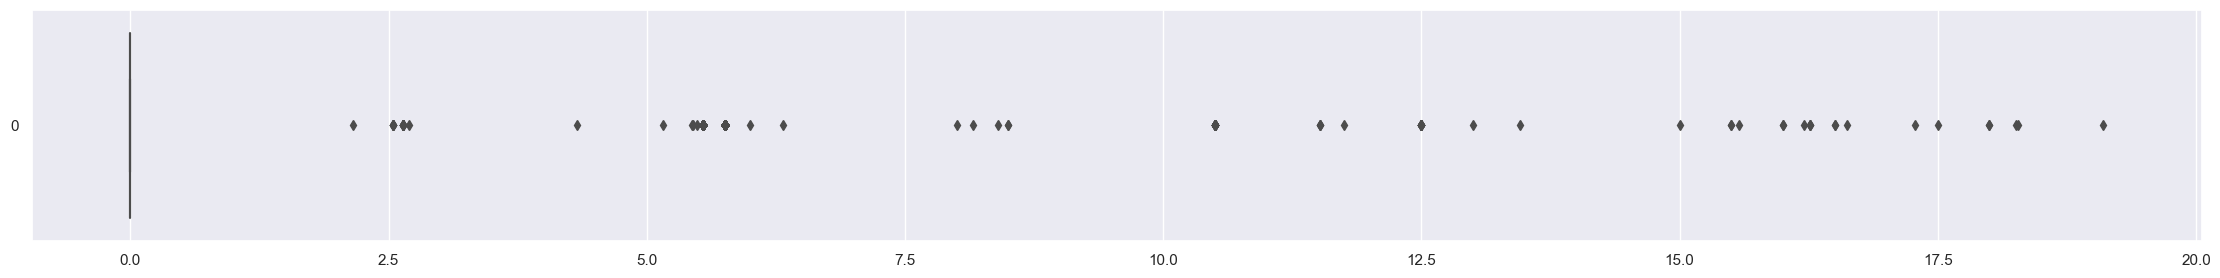

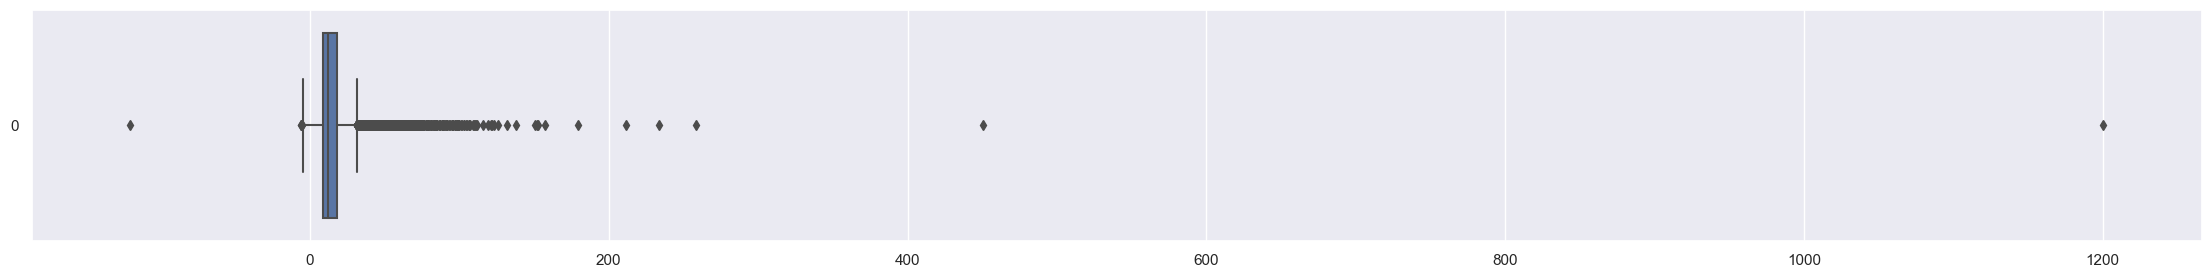

In [13]:
## Observing continious variables with and with out outliers
## Box plots
for i in continious:
    plt.figure(figsize = (28, 3))
    sns.boxplot(data=df[i], orient='h');

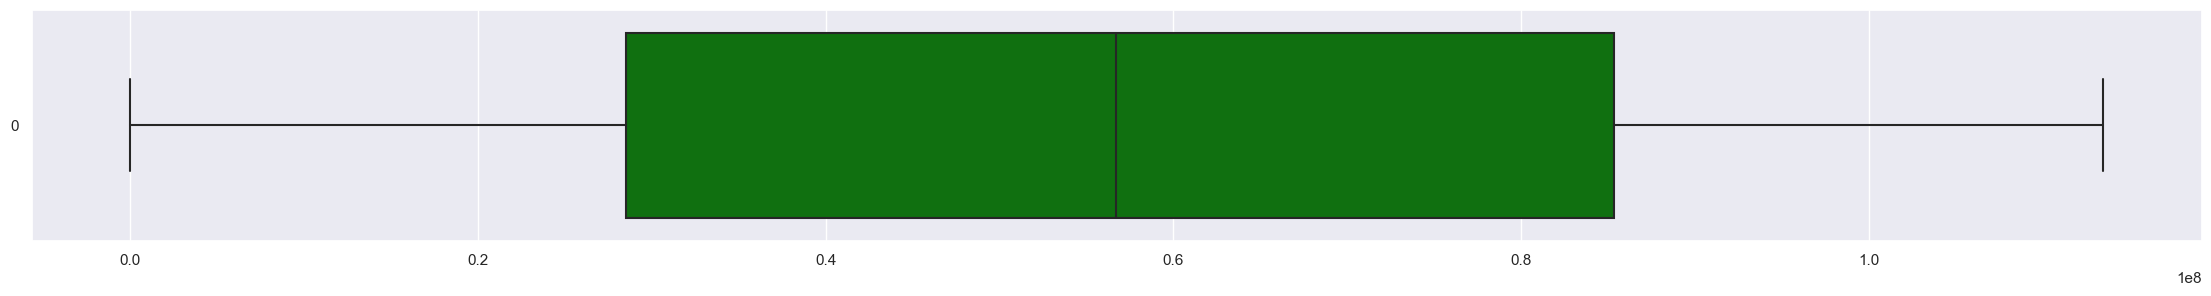

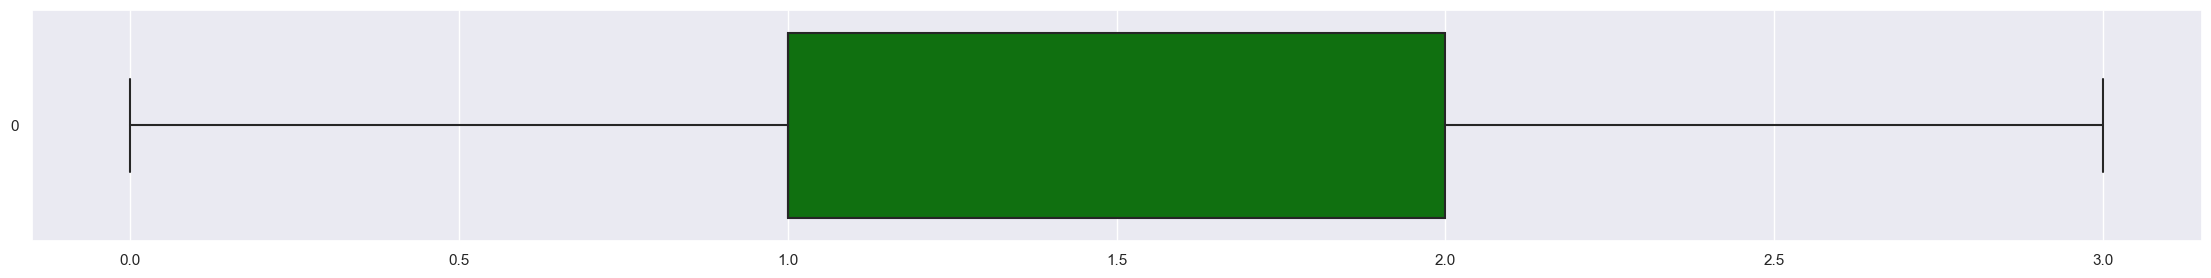

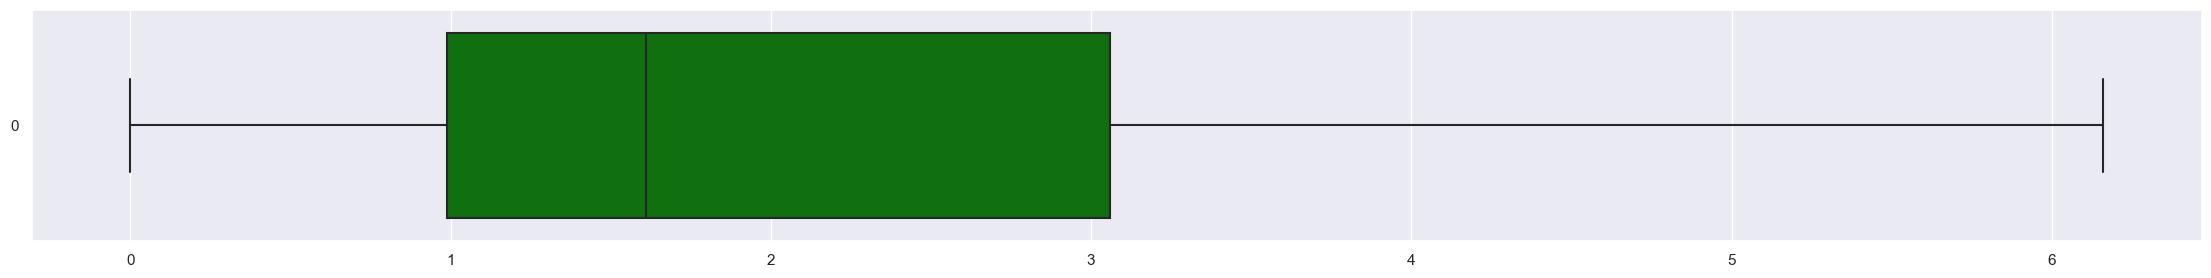

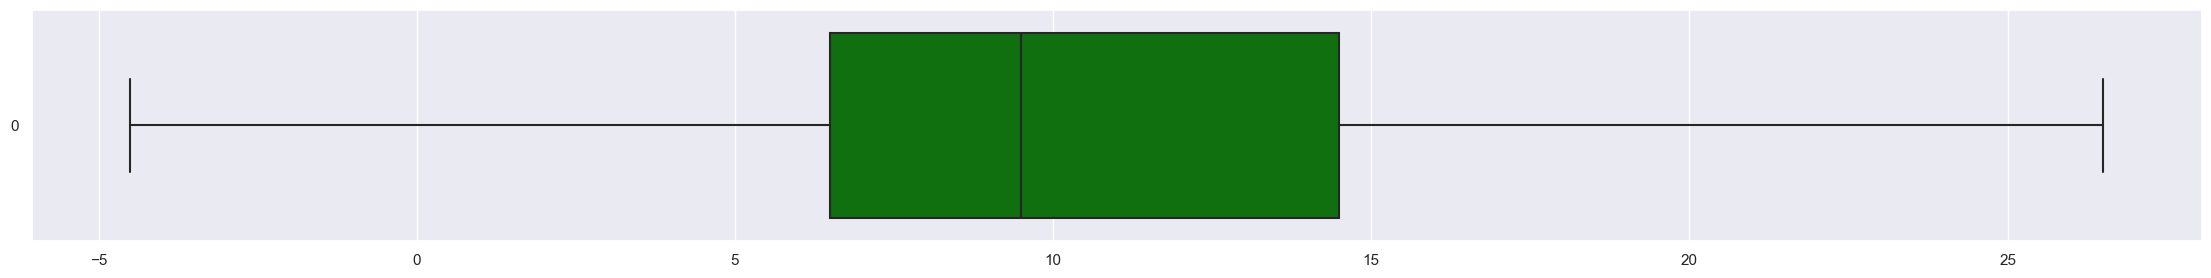

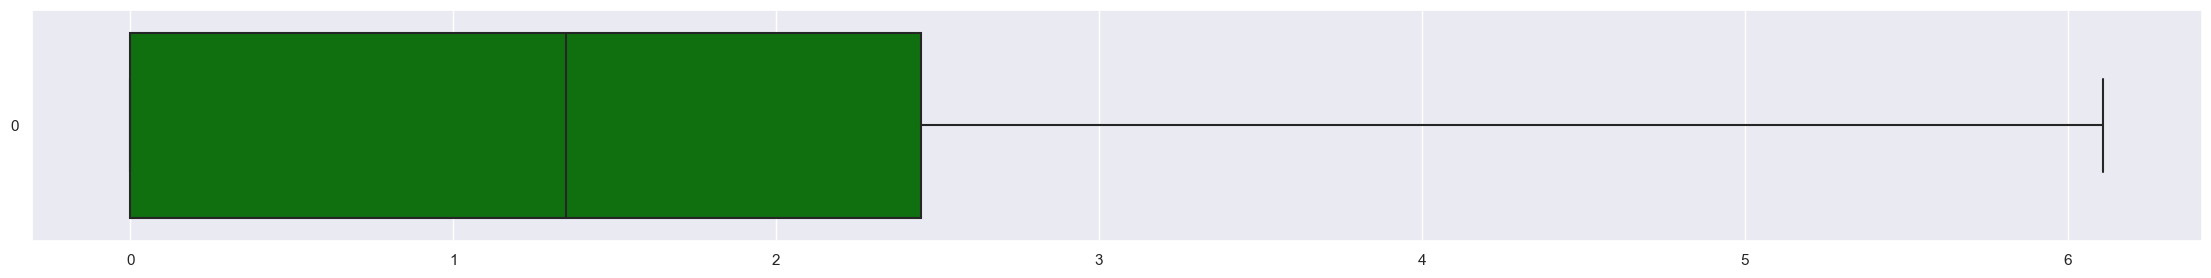

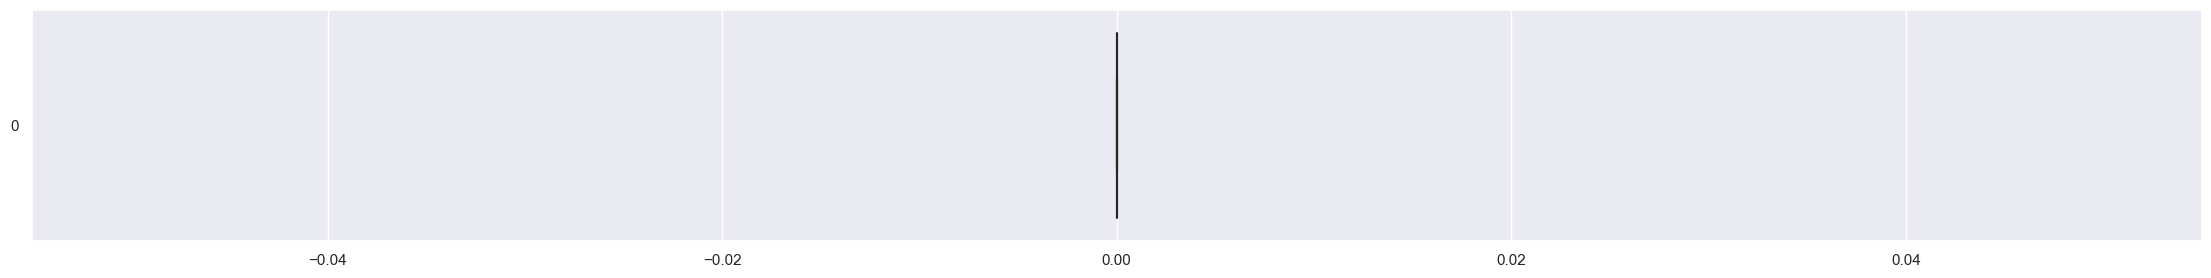

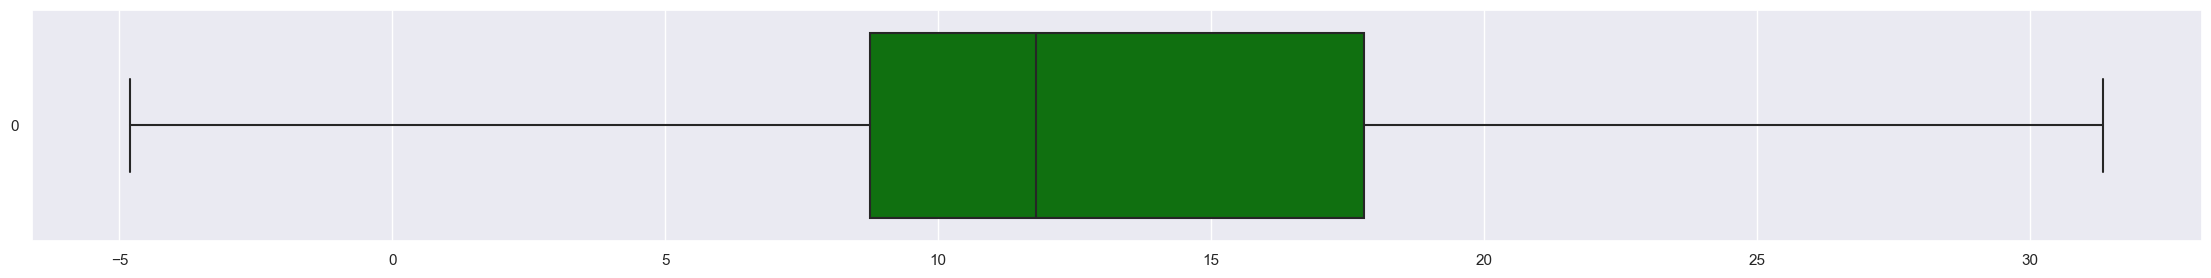

In [14]:
## Observing continious variables with out outliers
## Box plots
for i in continious:
    plt.figure(figsize = (28, 3))
    sns.boxplot(data=df[i], orient='h', color='green', showfliers=False)

#### We can observe lots of outliers


Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

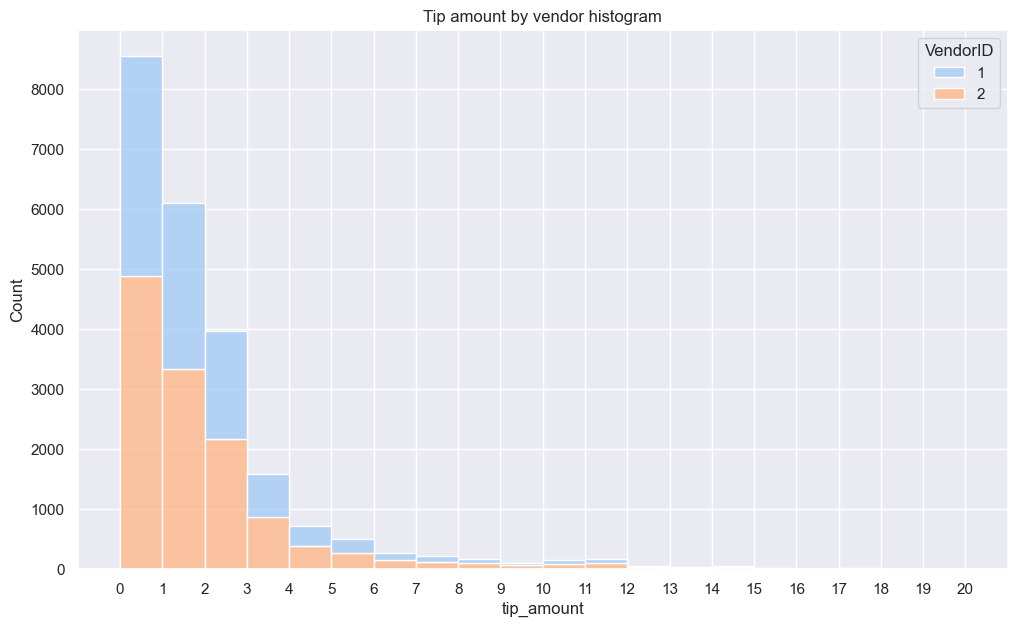

In [15]:
## histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

#### DateTime transformations

In [16]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


In [17]:
## The year is 2017
df['week'] = df['tpep_pickup_datetime'].dt.strftime('%V')
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%m')
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q').dt.strftime('%q')
df['day'] = df['tpep_pickup_datetime'].dt.strftime('%A')
df['hour'] = df['tpep_pickup_datetime'].dt.strftime('%H')

#### Validating dates

Validating dates

We need a way to determinate wich dates are missing. We will compare the dates that we have with a syntethic date range. The function pd.daterange() will create a datetime index off all dates between a start and end date (inclusive) given as arguments. pd.date_range() manPage

Seems we have from jan 1 to dec 31, all days

In [18]:
## creating a copy of the original but sorted on the pick up dates as index.
Df = df.sort_values(by='tpep_pickup_datetime', ascending=True).reset_index().drop(['index'], axis=1)
## Checking just for the days present
## .strftime('%d/%m/%Y')
Df['Y_m_d'] = Df['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')
Df['Y_m_d']  = pd.to_datetime(Df['Y_m_d']).dt.strftime('%Y-%m-%d')
## Validating dates, finding missing values with a calendar index
## Here we observe that ther is no difference.
full_2017 = pd.full_date_range = pd.date_range(start =Df['Y_m_d'][0], end = Df['Y_m_d'][22698])
full_2017.difference(Df['Y_m_d'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

#### Time spend in the taxi
Obtaining the amount of minutes per trip.

In [19]:
t1 = df['tpep_pickup_datetime']
t2 = df['tpep_dropoff_datetime']

diffe = t2 - t1
df['trip_time_min'] = round(diffe.dt.seconds / 60, 2)

#### Plotting and getting information related to total amount per month and week

In [20]:
## Month average.

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

g = df.groupby(['month']).agg({'total_amount':'mean'})
g.index = month_order
g

,total_amount
January,15.891462
February,16.358332
March,16.147335
April,15.855641
May,16.805057
June,16.761976
July,15.685115
August,16.101833
September,16.266655
October,16.312694


In [21]:
## Total revenue by month.
m = df.groupby(['month']).agg({'total_amount':'sum'}) 
m.index = month_order
m

,total_amount
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38
October,33065.83


In [22]:
## Average amount by day
## with Wed, Thu and Friday higher count of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
d = df.groupby(['day']).agg({'total_amount':'mean'}) 
d.index = day_order
d

,total_amount
Monday,16.354744
Tuesday,16.913808
Wednesday,15.205049
Thursday,16.218833
Friday,16.808322
Saturday,16.424997
Sunday,16.315773


In [23]:
## Total revenue by day
## with Wed, Thu and Friday higher count of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
d = df.groupby(['day']).agg({'total_amount':'sum'}) 
d.index = day_order
d

,total_amount
Monday,55818.74
Tuesday,49574.37
Wednesday,51195.40
Thursday,48624.06
Friday,57181.91
Saturday,52527.14
Sunday,55310.47


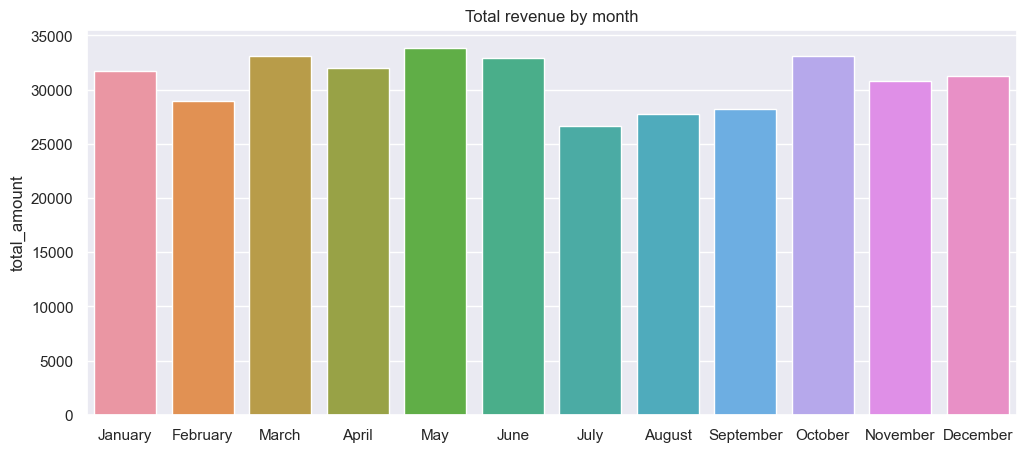

In [24]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x=m.index, y=m['total_amount'])
plt.title('Total revenue by month');

#### Calculating and analysisng distances

In [25]:
## Average trip distance for each drop of location
distance_do = df.groupby('DOLocationID').mean()[['trip_distance']]
distancias = distance_do.sort_values(by='trip_distance')

### Notes of wisdom 
This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations. 

To confirm this conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

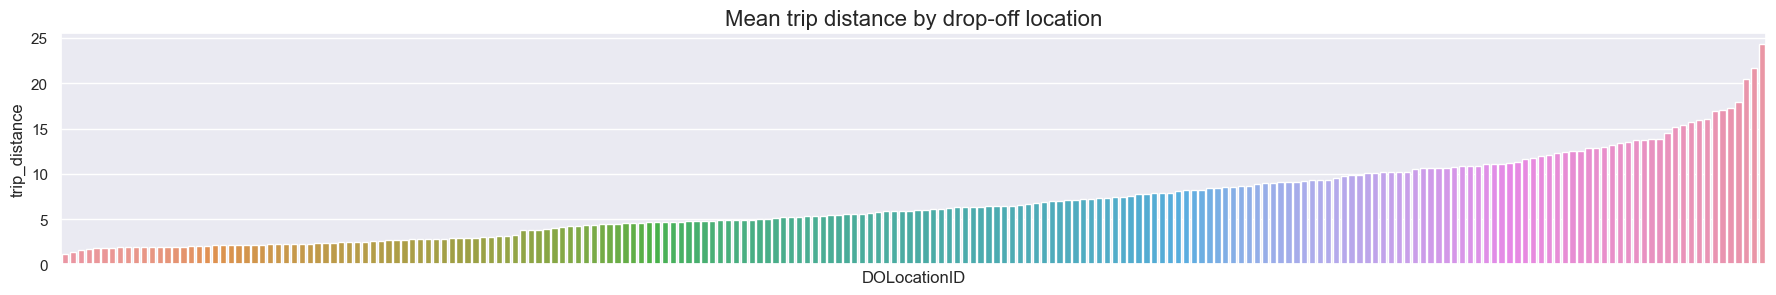

In [26]:
## Bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(22,3))
ax = sns.barplot(x=distancias.index, 
                 y=distancias['trip_distance'],
                 order=distancias.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

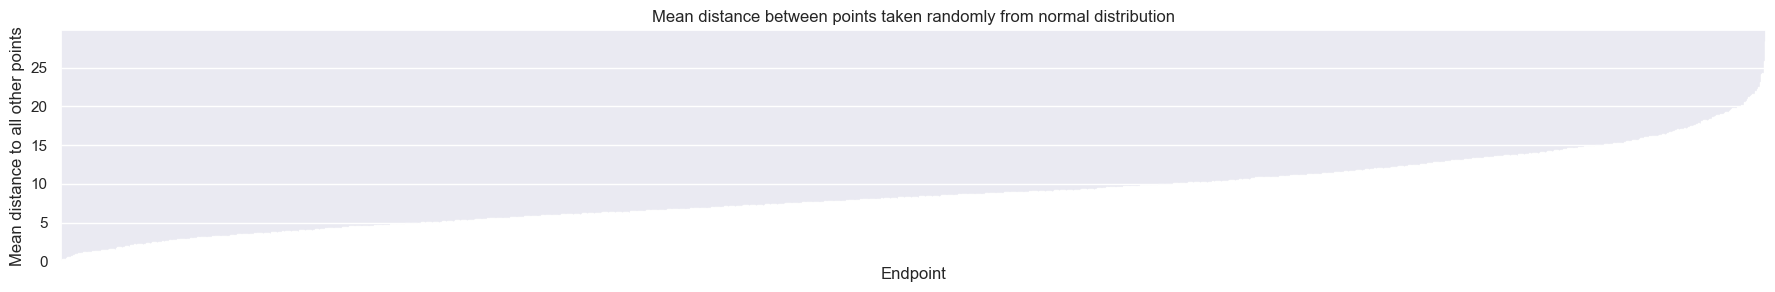

In [27]:
# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(22,3))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index, 
                 palette='pastel'
                )
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does *not* mean that there was an even distrubtion of *rides* to each drop-off point. Examine this next.

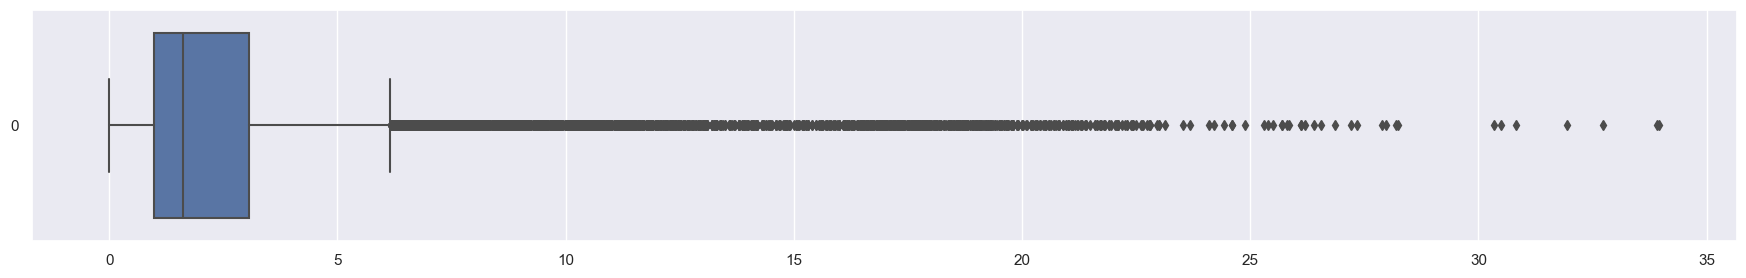

In [28]:
## Distribution of the distances
plt.figure(figsize=(22,3))
sns.boxplot(data=df['trip_distance'], orient='h');

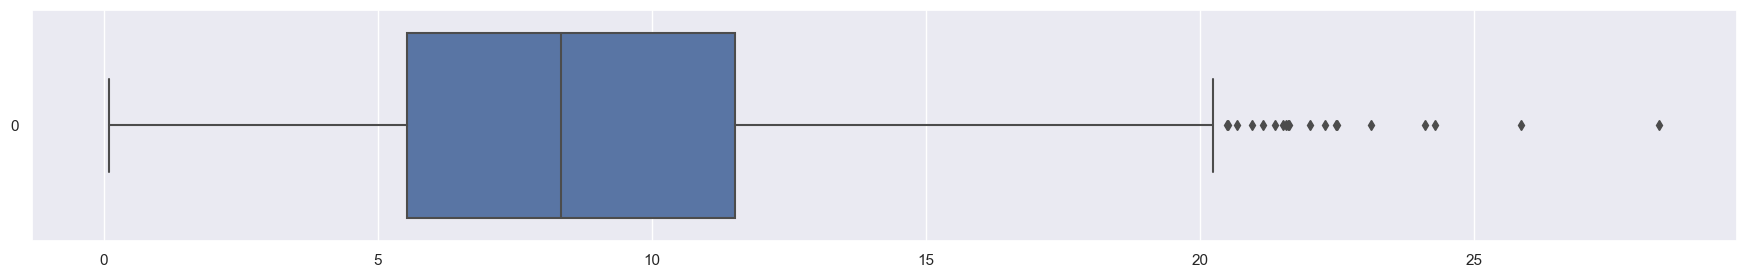

In [29]:
## Distribution of the distances, normal distribution.
plt.figure(figsize=(22,3))
sns.boxplot(data=data['distance'], orient='h');


#### **Histograms of the rides by drop off location**

First, check whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

There are many ways to do this.

In [30]:
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

There are 49 numbers that do not represent a drop-off location.

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other.

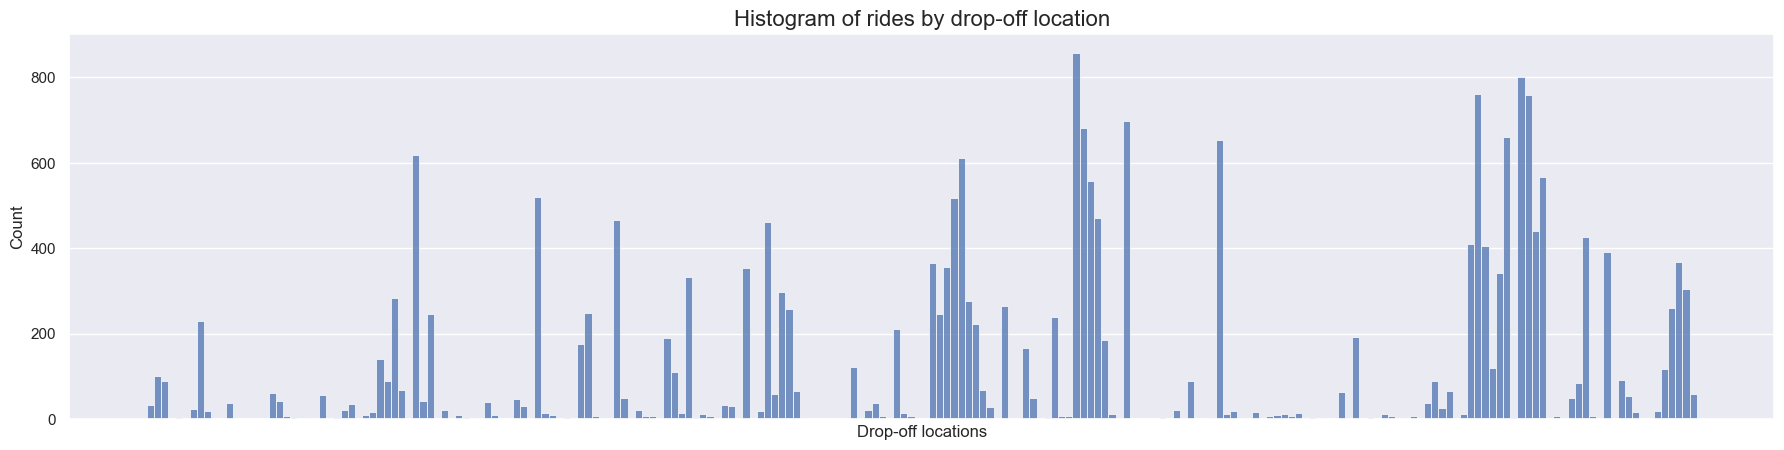

In [31]:
plt.figure(figsize=(22,5))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

In [32]:
## Rides where the distance is equal to zero
dist_zero = (df['trip_distance'] == 0.0)
missing_distance = df.iloc[dist_zero.values]    

In [33]:
missing_distance.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time_min
count,1.480000e+02,148.000000,148.000000,148.0,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,5.605594e+07,1.439189,1.412162,0.0,2.689189,0.006757,171.695946,175.506757,1.756757,23.130743,0.337838,0.408784,2.658378,0.715541,0.285811,27.537095,1.103378
std,3.389944e+07,0.497973,1.029689,0.0,8.137301,0.082199,72.652716,74.837011,0.761502,47.338249,0.626013,0.202343,6.034297,2.596492,0.072853,51.098598,3.822936
min,2.581300e+04,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,-2.500000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-4.300000,0.000000
25%,2.609332e+07,1.000000,1.000000,0.0,1.000000,0.000000,132.000000,132.000000,1.000000,2.500000,0.000000,0.500000,0.000000,0.000000,0.300000,3.800000,0.050000
50%,5.365850e+07,1.000000,1.000000,0.0,1.000000,0.000000,163.000000,166.000000,2.000000,3.000000,0.000000,0.500000,0.000000,0.000000,0.300000,6.710000,0.150000
75%,8.571030e+07,2.000000,1.000000,0.0,2.000000,0.000000,237.250000,249.000000,2.000000,30.000000,0.500000,0.500000,2.130000,0.000000,0.300000,32.437500,0.507500
max,1.132449e+08,2.000000,6.000000,0.0,99.000000,1.000000,265.000000,265.000000,4.000000,450.000000,4.500000,0.500000,46.690000,18.000000,0.300000,450.300000,32.120000


In [34]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time_min
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,0.004361,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.077205
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,0.065898,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,62.694512
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,0.000000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,0.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,0.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.180000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,0.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.380000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,1.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


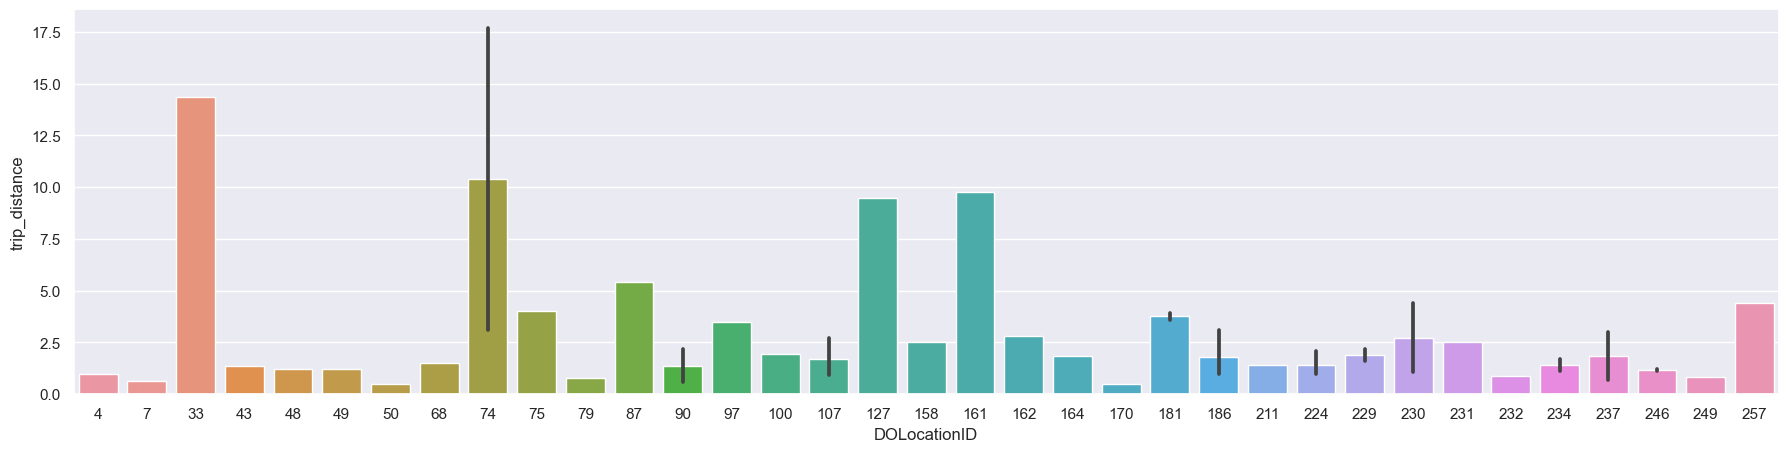

In [35]:
## Randomly selecting 3 times and seeing 50 locations
## the darker lines or error bars are graphical representations of the variability 
## of data and used on graphs to indicate the error or uncertainty 
## in a reported measurement, in this case distance.

sample = df.sample(n=50, replace=True, random_state=42)
plt.figure(figsize=(22,5))
sns.barplot(data=sample, x=sample['DOLocationID'], y=sample['trip_distance']);

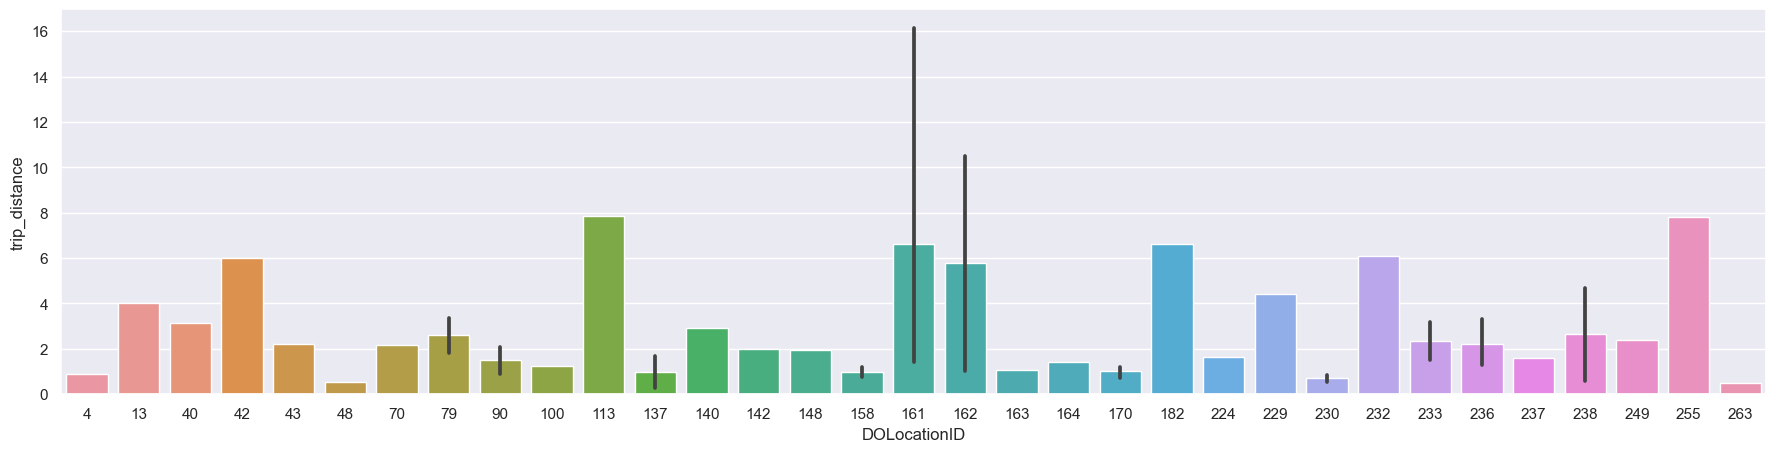

In [36]:
sample = df.sample(n=50, replace=True, random_state=2)
plt.figure(figsize=(22,5))
sns.barplot(data=sample, x=sample['DOLocationID'], y=sample['trip_distance']);

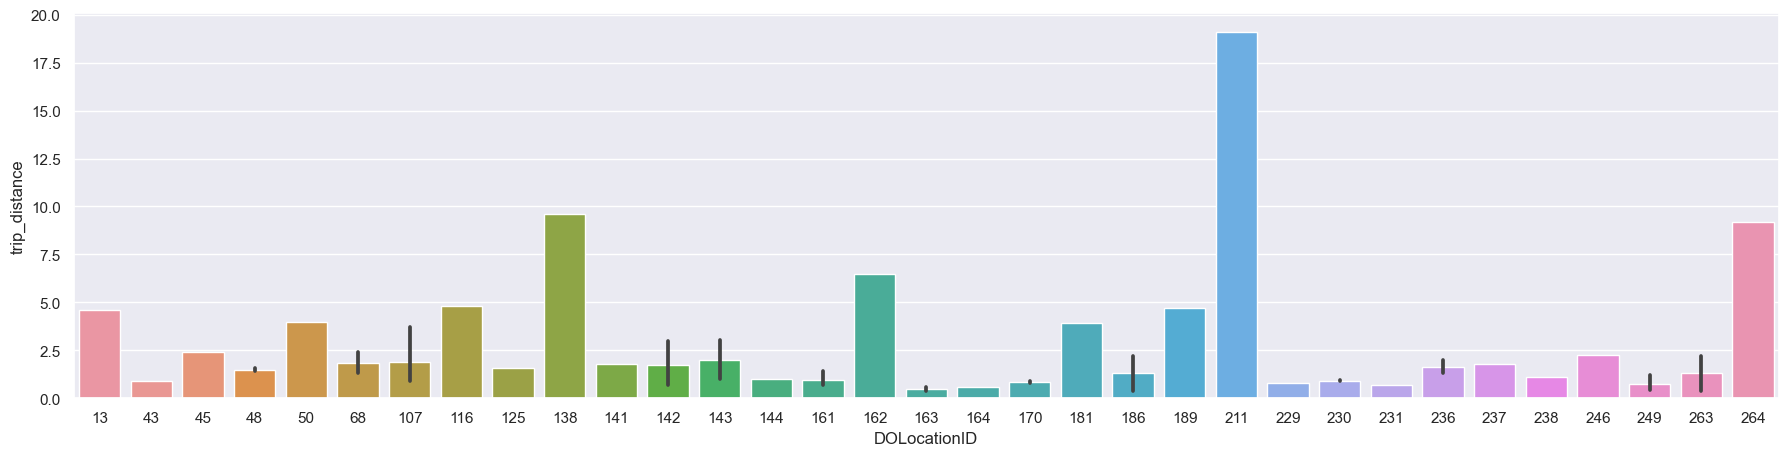

In [37]:
sample = df.sample(n=50, replace=True, random_state=54)
plt.figure(figsize=(22,5))
sns.barplot(data=sample, x=sample['DOLocationID'], y=sample['trip_distance']);

#### Plot that shows the relationship between the totalAmount and distance columns in the Df DataFrame. 
The points of distance zero are noted in red

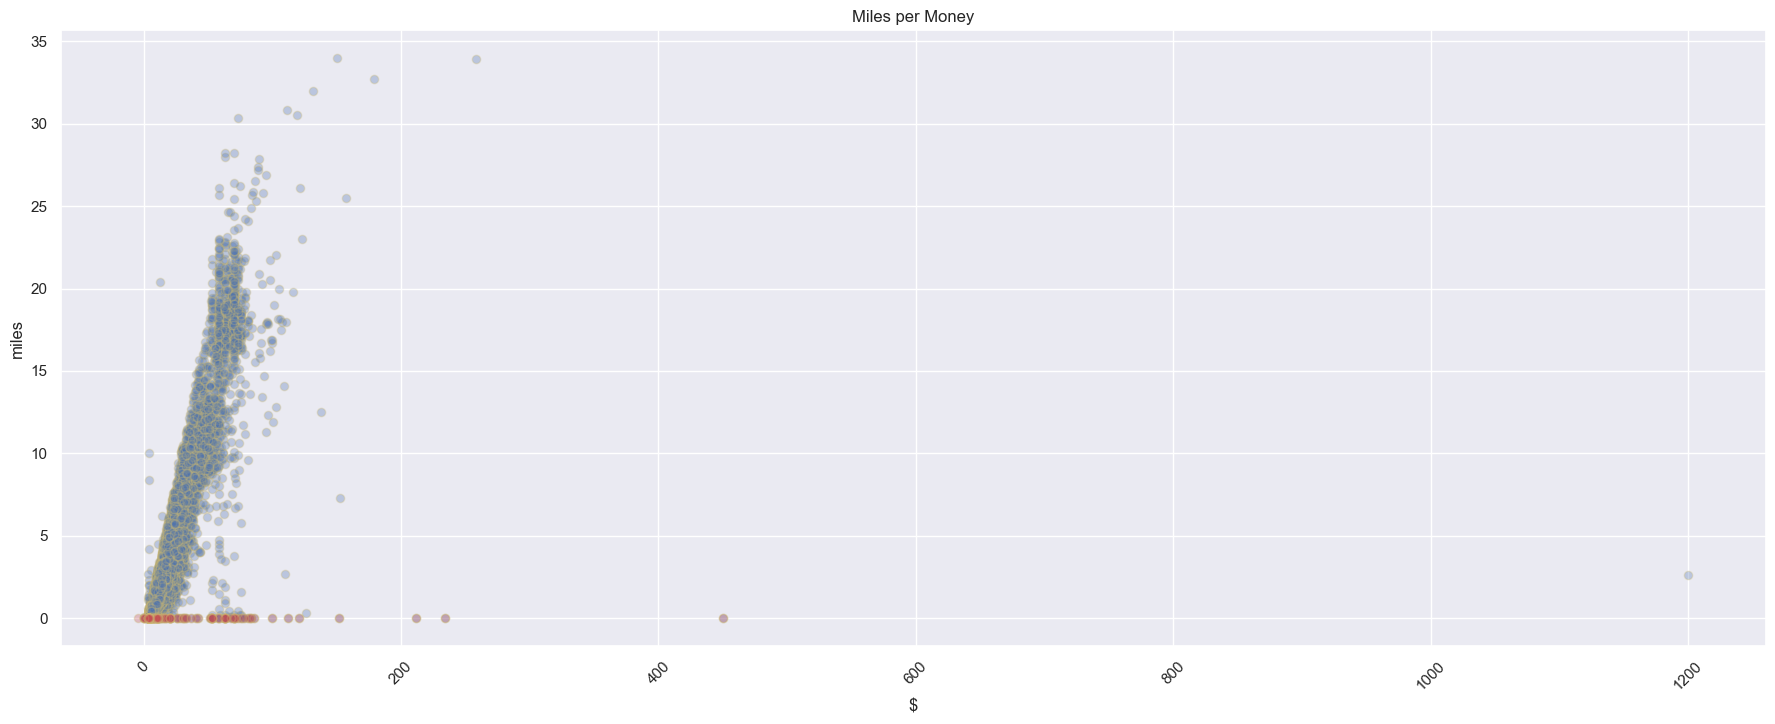

In [38]:
colors = ('b')
colors2 = ('r')

non_zero = df[df['trip_distance'] > 0 ]
non_zero = df[df['total_amount'] < 400.0]
non_zero = df[df['total_amount'] > 0]

#non_zero
si_zero = df[df['trip_distance'] <= 0]
#si_zero


fig, ax = plt.subplots(figsize=(22,8))
ax.scatter(non_zero['total_amount'], non_zero['trip_distance'],c=colors, alpha=0.3, edgecolor='y')
ax.scatter(si_zero['total_amount'], si_zero['trip_distance'],c=colors2, alpha=0.3, edgecolor='y')
ax.set_xlabel('$')
ax.set_ylabel('miles')
ax.set_title('Miles per Money')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

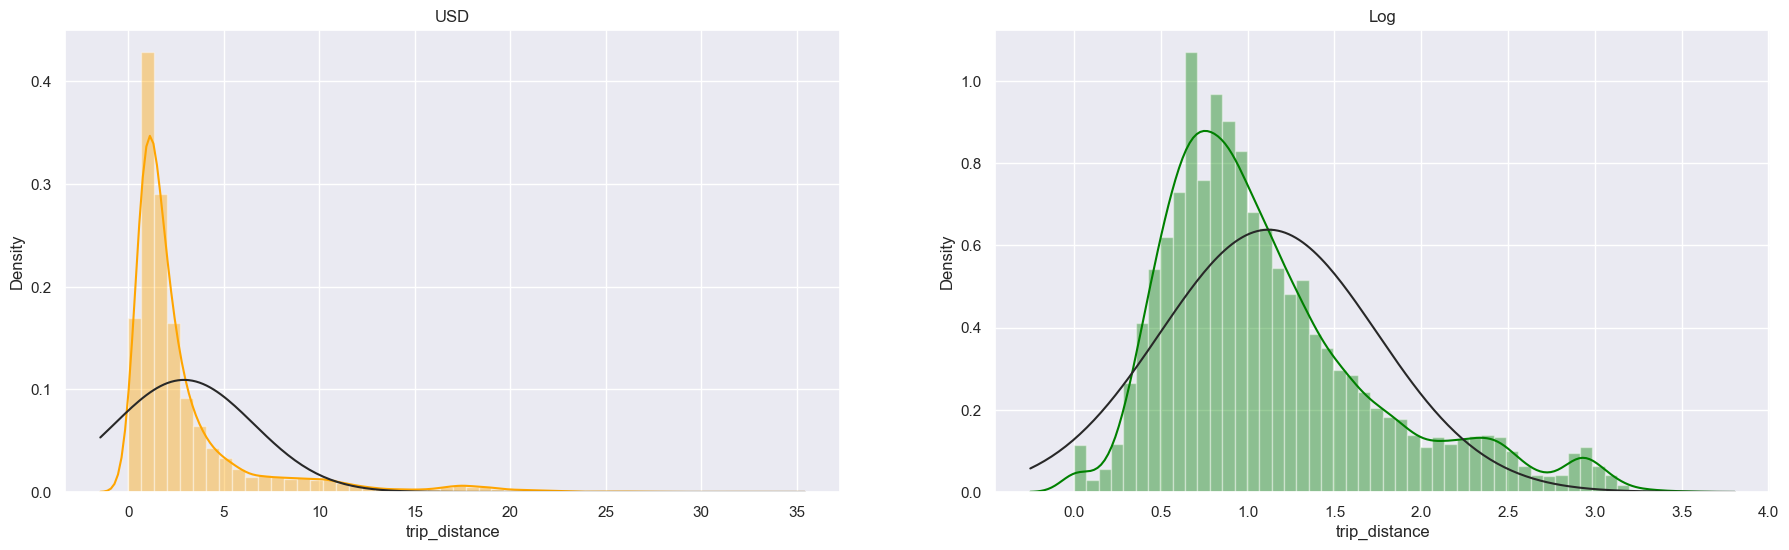

In [39]:
## this is the distibution of the total Amount. I also log it to compare.

plt.figure(figsize=(22, 6))

plt.subplot(1, 2, 1)
sns.distplot(df['trip_distance'], kde=True, fit=scipy.stats.norm , color='Orange') 
plt.title('USD')
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df['trip_distance']), kde=True, fit=scipy.stats.norm, color='Green') ## fits is deprecated, still good to demo.
plt.title('Log');

### Notes

the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values. 

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model? 

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model. 


## Conclusion
From the initial observations:

We have categorical and continuous data.

Although seems like we are not missing values, we are missing information in the distance feature.

The total amount feature is not normally distributed.

We have group data by quarter, months, days, hours and observe measurements of central tendency, dispersion and location.

The data is clean and we need to make some calls related to dropping the examples with missing distance or not.

Latter we need to transform the rest of the features and scale to try to make it look as normal as we can.

In [40]:
## SAVED!
## df.to_csv('/home/scicat/Downloads/coursera/automatidata/statsDS/2017_Yellow_Taxi_Trip_Data_2.csv', index=False)